![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

### 2. Preparación de datos

A continuación con el equipo trabajaremos en el análisis de los datos y su transformaciones correspondientes para que estos sean aptos para el modelo y así logral el objetivo, el cual es la clasificación de un paciente como hospitalizado o no hospitalizado.

Caso(Hospitalización = SI) : ['fue sometido a biopsia prostática' and 'En un periodo máximo de 30 días posteriores al procedimiento presentó: (fiebre' or 'infección urinaria' or 'Sepsis')];

Control(Hospitalización = NO) : ['fue sometido a biopsia prostática' and 'En un periodo máximo de 30 días posteriores al procedimiento NO presentó: (fiebre' or 'infección urinaria' or 'Sepsis')]

Importamos las librerías que usaremos a lo largo del proyecto

In [799]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
#from imblearn.over_sampling import ADASYN

Cargamos el archivo con los datos y visualizamos los primeros '3' elementos para tener una idea general del dataframe

Cargamos la base de datos dada y procedemos a analizar la estructura de la misma obteniendo los primeros '3' elementos del dataframe previamente generado.

In [800]:
dataHosp = pd.read_excel('../data/BBDD_Hospitalización.xlsx')
dataHosp.head(3)

c:\Users\germa\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0


Debido a que nuestro trabajo es: poder clasificar los campos que más influyen en la hospitalizacion de una persona,posteriormente de ser sometido a una biopsia prostatica, y predecir si el paciente será hospitalizado. Decidimos optar por eliminar las columnas ['DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC'] debido que no aportan información revelante a nuestro análisis y modelado, ya que los datos que necesitamos son previos a la hospitalización o variable objetivo.

In [801]:
dataHosp.drop(columns=['DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC','AGENTE AISLADO'], inplace=True)

Verificamos si los campos tienen valores nulos y realizamos un análisis en base a los resultados.

In [802]:
for column in dataHosp.columns:
    print(f'{column} presenta: {dataHosp[column].isna().sum()} valores nulos')

EDAD presenta: 2 valores nulos
DIABETES presenta: 2 valores nulos
HOSPITALIZACIÓN ULTIMO MES presenta: 2 valores nulos
PSA presenta: 6 valores nulos
BIOPSIAS PREVIAS presenta: 4 valores nulos
VOLUMEN PROSTATICO presenta: 3 valores nulos
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS presenta: 2 valores nulos
NUMERO DE MUESTRAS TOMADAS presenta: 2 valores nulos
CUP presenta: 3 valores nulos
ENF. CRONICA PULMONAR OBSTRUCTIVA presenta: 4 valores nulos
BIOPSIA presenta: 2 valores nulos
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA presenta: 2 valores nulos
FIEBRE presenta: 2 valores nulos
ITU presenta: 2 valores nulos
TIPO DE CULTIVO presenta: 2 valores nulos
PATRON DE RESISTENCIA presenta: 2 valores nulos
HOSPITALIZACION presenta: 5 valores nulos


Debido a que fue definido como caso, aquel paciente que presentó una complicación infecciosa en un período de 30 días luego de la biopsia, independientemente del día en específico dentro de este rango, renombraremos la columna y normalizamos

In [803]:
dataHosp.rename(columns={'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'PRESENTÓ COMPLICACIÓN INFECCIOSA'}, inplace=True)
dataHosp.loc[dataHosp['PRESENTÓ COMPLICACIÓN INFECCIOSA'] != 'NO', 'PRESENTÓ COMPLICACIÓN INFECCIOSA'] = 'SI'

Al visualizar pocos valores nulos en los distintos campos podemos pasar a revisar la distribución y, así, evaluar que métrica es óptima para la imputación de los mismos.

Graficaremos un histograma para visualizar más precisamente cada variable, si existen valores atipicos al no contar con un cliente directo, nuestro equipo de trabajo tomará el curso de acción que crea conveniente para cada caso.

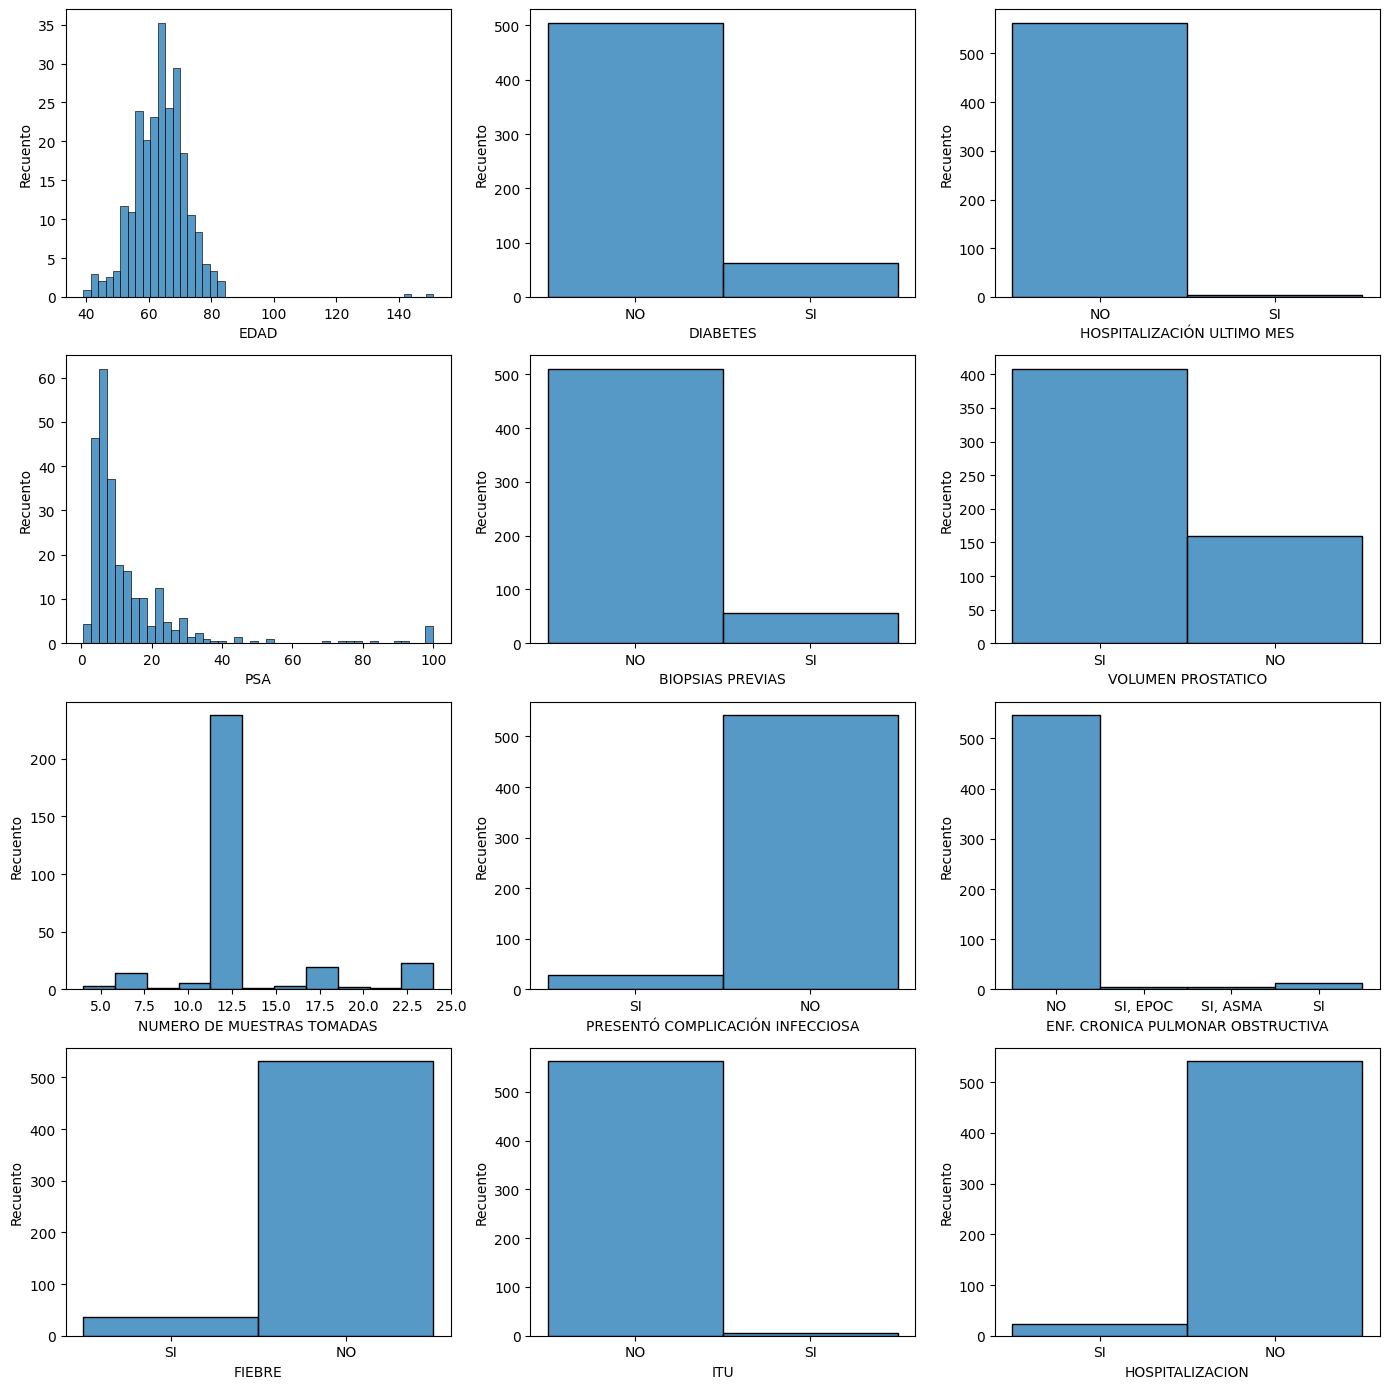

In [804]:
fig, axes = plt.subplots(4, 3, figsize=(14, 14))
features = ['EDAD','DIABETES','HOSPITALIZACIÓN ULTIMO MES'],['PSA','BIOPSIAS PREVIAS','VOLUMEN PROSTATICO'],['NUMERO DE MUESTRAS TOMADAS','PRESENTÓ COMPLICACIÓN INFECCIOSA','ENF. CRONICA PULMONAR OBSTRUCTIVA'],['FIEBRE','ITU','HOSPITALIZACION']
for i in range(len(features)):
    for j in range(len(features[i])):
        ax = sns.histplot(dataHosp[features[i][j]], kde=False, stat='frequency', ax=axes[i][j])
        ax.set_ylabel('Recuento')

plt.tight_layout()  # Ajustar el espaciado entre los subplots
plt.show()  

Al observar, la columna ['ENF. CRONICA PULMONAR OBSTRUCTIVA'] consideramos en función a los datos proporcionados, que el tipo de enfermedad pulmonar es irrelevante para el estudio. Por lo mismo, vamos a quedarnos con variables catégoricas ('SI', 'NO').

In [805]:
dataHosp.loc[(dataHosp['ENF. CRONICA PULMONAR OBSTRUCTIVA'] != 'SI') & (dataHosp['ENF. CRONICA PULMONAR OBSTRUCTIVA'] != 'NO')]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,PRESENTÓ COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,PATRON DE RESISTENCIA,HOSPITALIZACION
26,75.0,NO,NO,25.0,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO
27,77.0,NO,NO,91.8,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 10,NO,NO,NO,NO,NO,NO
28,75.0,NO,NO,21.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO
29,77.0,NO,NO,98.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 10,NO,NO,NO,NO,NO,NO
30,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO,NO
31,63.0,NO,NO,10.8,NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NaN
32,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO,NO
33,63.0,NO,NO,10.5,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO
566,67.0,NO,NO,8.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO
567,59.0,NO,NO,9.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO


In [806]:
dataHosp['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = dataHosp['ENF. CRONICA PULMONAR OBSTRUCTIVA'].str[0:2]
dataHosp.drop([568,569], inplace = True)

Con el campo EDAD:
Al tener una distribución normal podemos computar tanto los valores faltantes como los atípicos con la mediana de los valores menores a 100, ya que entendemos que una edad mayor a esta en la mayoría de los casos se debe a un error de carga.

In [807]:
medianaEdad = int(dataHosp['EDAD'].loc[dataHosp['EDAD'] < 100].mean())
dataHosp.loc[(dataHosp['EDAD'] > 100) | (dataHosp['EDAD'].isna()), 'EDAD'] = medianaEdad

PSA: Debido a que el recuento de valores mayores a 40 es bajo, creemos que los valores mayores a 85 son errores de carga así que lo imputaremos con la mediana de los datos, ya que esta métrica no se ve altamente afectada ante los valores átipicos que sesgan hacia la derecha nuestra muestra.

In [808]:
dataHosp.loc[(dataHosp['PSA'] == None) | (dataHosp['PSA'] > 85),'PSA'] = round(dataHosp['PSA'].median(), 2)

Habiendo normalizado los campos que creiamos convenientes de cara al análisis y teniendo en cuenta la poca cantidad de valores faltantes, decidimos eliminar las instancias que contenían nulos.

In [809]:
dataHosp.dropna(inplace = True, axis=0)


En la utilización de Machine Learning se requieren datos númericos incluso cuando se habla de variables categóricas, por lo tanto, procederemos a transformar estas en una codificación pertinente para el uso de lo modelos.
Las variables categoricas que contengan unicamente 'SI' y 'NO' las codificaremos a 1s y 0s.

In [810]:
categorical01 = ['DIABETES','HOSPITALIZACIÓN ULTIMO MES','BIOPSIAS PREVIAS','VOLUMEN PROSTATICO','CUP','ENF. CRONICA PULMONAR OBSTRUCTIVA','PRESENTÓ COMPLICACIÓN INFECCIOSA','FIEBRE','ITU','HOSPITALIZACION']
for feature in categorical01:
    dataHosp[feature] = pd.Categorical(dataHosp[feature]).codes

Al ser definido como caso de hospitalización aquellos pacientes que en un período de 30 días posteriores a la biopsía prostática presentaron fiebre, ITU o sepsis. Podemos notar que en nuestra base de dato no contamos con una columna que evalue la presencia de sepsis. En consecuencia, definiremos esta como todos los casos donde no se presentó fiebre o ITU pero terminaron en una hospitalización.

In [811]:
dataHosp['SEPSIS'] = 0
dataHosp.loc[(dataHosp['HOSPITALIZACION'] == 1) & (dataHosp['FIEBRE'] == 0) & (dataHosp['ITU'] == 0), 'SEPSIS'] = 1

In [812]:
dataHosp.loc[dataHosp['SEPSIS'] == 1]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,PRESENTÓ COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,PATRON DE RESISTENCIA,HOSPITALIZACION,SEPSIS
5,55.0,1,1,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,NEG,1,0,0,NO,NO,1,1
13,43.0,0,0,6.0,0,0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,0,NEG,1,0,0,NO,NO,1,1
20,64.0,1,0,5.7,0,1,CEFALOSPORINA_AMINOGLUCOCIDO,24.0,0,0,NEG,1,0,0,NO,NO,1,1


In [813]:
nuevoOrden = ['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA', 'BIOPSIAS PREVIAS',
             'VOLUMEN PROSTATICO', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
             'NUMERO DE MUESTRAS TOMADAS', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA',
             'BIOPSIA', 'PRESENTÓ COMPLICACIÓN INFECCIOSA', 'FIEBRE', 'ITU', 'SEPSIS',
             'TIPO DE CULTIVO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION']

dataHosp = dataHosp.reindex(columns = nuevoOrden)

Realizamos una matriz de correlación y teniendo en cuenta que tan alto o bajo sea el coheficiente Pearson nos quedaremos con los campos que ayuden a explicar nuestra variable objetivo.

In [814]:
mapa = dataHosp.corr(numeric_only= True)
mapa.style.background_gradient(cmap='coolwarm')

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,PRESENTÓ COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,SEPSIS,HOSPITALIZACION
EDAD,1.000000,0.135945,-0.027071,0.286557,-0.086703,0.259013,-0.211632,0.134053,0.120998,-0.022984,0.004885,-0.003971,-0.090329,-0.052362
DIABETES,0.135945,1.000000,0.026111,0.021304,-0.059536,0.081345,-0.050063,-0.030372,-0.004653,0.059474,-0.024710,0.017647,0.128615,0.068334
HOSPITALIZACIÓN ULTIMO MES,-0.027071,0.026111,1.000000,-0.042270,-0.031184,-0.026284,0.034082,-0.008094,-0.017886,0.071302,0.052398,-0.009932,0.253063,0.075916
PSA,0.286557,0.021304,-0.042270,1.000000,-0.003467,0.091455,-0.150882,0.150425,0.020470,-0.062906,-0.012728,-0.024345,-0.045497,-0.061808
BIOPSIAS PREVIAS,-0.086703,-0.059536,-0.031184,-0.003467,1.000000,-0.068781,0.396243,-0.027866,0.005281,-0.012417,0.037260,-0.034191,-0.024111,-0.007008
VOLUMEN PROSTATICO,0.259013,0.081345,-0.026284,0.091455,-0.068781,1.000000,-0.111312,0.052575,0.049827,0.037069,0.048215,0.064507,-0.009354,0.027419
NUMERO DE MUESTRAS TOMADAS,-0.211632,-0.050063,0.034082,-0.150882,0.396243,-0.111312,1.000000,-0.086567,-0.077870,0.077628,0.067340,0.026733,0.056353,0.085355
CUP,0.134053,-0.030372,-0.008094,0.150425,-0.027866,0.052575,-0.086567,1.000000,-0.015983,-0.018437,-0.022356,-0.008875,-0.006259,-0.017651
ENF. CRONICA PULMONAR OBSTRUCTIVA,0.120998,-0.004653,-0.017886,0.020470,0.005281,0.049827,-0.077870,-0.015983,1.000000,-0.040738,-0.049399,-0.019610,-0.013829,-0.039001
PRESENTÓ COMPLICACIÓN INFECCIOSA,-0.022984,0.059474,0.071302,-0.062906,-0.012417,0.037069,0.077628,-0.018437,-0.040738,1.000000,0.718874,0.481377,0.339462,0.957368


Obviaremos aquellas correlaciones con 'HOSPITALIZACION' (VARIABLE OBJETIVO) muy cercanas a 0 y nos quedaremos únicamente con aquellas mayores a 0.30

In [815]:
features = ['FIEBRE','ITU','SEPSIS', 'HOSPITALIZACION']
dataNorm = dataHosp[features]

Exportamos los datos normalizados a un csv para luego poder realizar la carga de los mismos a la hora de crear y entrenar el modelo

In [816]:
dataNorm.to_csv('../data/Hospitales_Normalizados.csv', index = False)

Se observó una desproporción en los datos de casos positivos y negativos en la hospitalización, decidimos realizar un sobremuestro de los datos, ajustando la proporción de los mismos para mejorar las predicciones del modelo 

In [817]:
dataNorm['HOSPITALIZACION'].value_counts()

HOSPITALIZACION
0    534
1     23
Name: count, dtype: int64

In [818]:
nuevos = dataNorm.loc[dataNorm['HOSPITALIZACION'] == 1]
sample = nuevos.sample(23)
df2 = pd.concat([dataNorm, sample])

for i in range(0, 13):
    sample_p = df2.loc[df2['HOSPITALIZACION'] == 1].sample(23)
    sample_n = df2.loc[df2['HOSPITALIZACION'] == 0].sample(1)
    df2 = pd.concat([df2, sample_p, sample_n])

In [819]:
only_itu = df2.loc[df2['ITU'] == 1].sample(38)
only_itu['FIEBRE'] = 0

only_sepsis = df2.loc[df2['SEPSIS'] == 1].sample(33)

df2 = pd.concat([df2, only_itu, only_sepsis])

In [820]:
df2['HOSPITALIZACION'].value_counts()

HOSPITALIZACION
0    547
1    416
Name: count, dtype: int64

In [821]:
mapa = dataNorm.corr(numeric_only= True)
mapa.style.background_gradient(cmap='coolwarm')

,FIEBRE,ITU,SEPSIS,HOSPITALIZACION
FIEBRE,1.000000,0.396979,-0.019344,0.679420
ITU,0.396979,1.000000,-0.007679,0.502813
SEPSIS,-0.019344,-0.007679,1.000000,0.354579
HOSPITALIZACION,0.679420,0.502813,0.354579,1.000000


In [822]:
mapa = df2.corr(numeric_only= True)
mapa.style.background_gradient(cmap='coolwarm')

,FIEBRE,ITU,SEPSIS,HOSPITALIZACION
FIEBRE,1.000000,0.397492,-0.215588,0.712473
ITU,0.397492,1.000000,-0.135900,0.494490
SEPSIS,-0.215588,-0.135900,1.000000,0.361372
HOSPITALIZACION,0.712473,0.494490,0.361372,1.000000


In [824]:
#df2.to_csv('../data/Hospitales_Oversample.csv', index = False)